# 05 - Clustering

## Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np


# scalers
from sklearn.preprocessing import StandardScaler


# cluster
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth

from sklearn.metrics import confusion_matrix

# UMAP
#!pip install umap-learn
import umap


import matplotlib.pyplot as plt

import sys
#sys.path.append('/Users/antoniooliveira/Projects/NTT Project')
sys.path.append('C:/Users/aprataso/NTT_Project/Projects/NTT Project/')
import functions

pd.set_option('display.max_columns', None)

In [2]:
#path = '/Users/antoniooliveira/Downloads/NTT project/original_data'
path = "C:/Users/aprataso/Downloads/final_data/original_data"

customer_info = pd.read_csv(f'{path}/801_treated.csv')
customer_info.set_index('household_key')
customer_info = customer_info.drop('Unnamed: 0', axis = 1)
customer_info.head(2)

,marital_status_code,homeowner_desc,household_key,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,gender(s),retail_disc,coupon_disc,coupon_match_disc,first_transaction_date,Groceries_spend,Delicacies_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,COSMETICS_spend,MISC. TRANS._spend,Seafood_spend,KIOSK-GAS_spend,SPIRITS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,AUTOMOTIVE_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,TRAVEL & LEISUR_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,Photo/Video_spend,RX_spend,PROD-WHS SALES_spend,PHARMACY SUPPLY_spend,TOYS_spend,HOUSEWARES_spend,HBC_spend,VIDEO RENTAL_spend,homeowner_code,total_quantity,total_sales_value,unique_dep_count
0,0,Homeowner,1,married,senior,2.0,0.0,65.0,42000,0.0,2,2.0,-0.403613,-0.046647,-0.015142,2021-02-20,3285.02,226.99,373.56,102.01,568.23,44.09,21.4,4.47,8.55,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1997,4634.32,10
1,0,Homeowner,7,married,middle-aged,2.0,0.0,49.5,62000,0.0,2,2.0,-0.375202,-0.023639,-0.004005,2021-01-23,2342.43,166.01,288.04,27.62,698.65,0.00,0.0,0.00,5.34,101.34,1.87,7.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1554,3638.35,10


since there are variables with very low spend values, experiments will be made without using said variables

In [3]:
pd.set_option('display.float_format', '{:.3f}'.format)
customer_info.describe().T

,count,mean,std,min,25%,50%,75%,max
marital_status_code,801.000,1.105,0.972,0.000,0.000,2.000,2.000,2.000
household_key,801.000,1235.176,736.805,1.000,596.000,1218.000,1914.000,2499.000
adult_category_size,801.000,1.566,0.496,1.000,1.000,2.000,2.000,2.000
has_kids,801.000,0.235,0.424,0.000,0.000,0.000,0.000,1.000
avg_age,801.000,44.054,11.817,21.500,39.500,49.500,49.500,65.000
avg_income,801.000,64810.237,46952.864,15000.000,29500.000,62000.000,87000.000,250000.000
n_kids,801.000,0.432,0.879,0.000,0.000,0.000,0.000,3.000
n_household,801.000,2.197,1.193,1.000,1.000,2.000,3.000,5.000
gender(s),801.000,1.401,0.755,0.000,1.000,2.000,2.000,2.000
retail_disc,801.000,-0.546,0.209,-2.492,-0.622,-0.500,-0.418,-0.161


In [4]:
# drop < 10
customer_info = customer_info.drop(['HOUSEWARES_spend', 'ELECT &PLUMBING_spend', 'HBC_spend', 'TOYS_spend', 
                                    'PHARMACY SUPPLY_spend', 'PROD-WHS SALES_spend', 'CHARITABLE CONT_spend',
                                    'POSTAL CENTER_spend', 'coupon_disc', 'coupon_match_disc'], axis = 1)

KeyError: "['ELECT &PLUMBING_spend', 'CHARITABLE CONT_spend'] not found in axis"

In [25]:
# drop < 15 
customer_info = customer_info.drop(['VIDEO RENTAL_spend', 'Photo/Video_spend', 
                                    'DELI/SNACK BAR_spend', 'GM MERCH EXP_spend'], axis = 1)

In [5]:
info_numeric = customer_info.loc[:, ~customer_info.columns.isin(
    ['homeowner_desc', 'marital_status', 'age_group',
     'first_transaction_date'])]

In [6]:
info_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   marital_status_code    801 non-null    int64  
 1   household_key          801 non-null    int64  
 2   adult_category_size    801 non-null    float64
 3   has_kids               801 non-null    float64
 4   avg_age                801 non-null    float64
 5   avg_income             801 non-null    int64  
 6   n_kids                 801 non-null    float64
 7   n_household            801 non-null    int64  
 8   gender(s)              801 non-null    float64
 9   retail_disc            801 non-null    float64
 10  coupon_disc            801 non-null    float64
 11  coupon_match_disc      801 non-null    float64
 12  Groceries_spend        801 non-null    float64
 13  Delicacies_spend       801 non-null    float64
 14  Meat_spend             801 non-null    float64
 15  Bakery

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)
info_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
marital_status_code,801.00,1.10,0.97,0.00,0.00,2.00,2.00,2.00
household_key,801.00,1235.18,736.80,1.00,596.00,1218.00,1914.00,2499.00
adult_category_size,801.00,1.57,0.50,1.00,1.00,2.00,2.00,2.00
has_kids,801.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
avg_age,801.00,44.05,11.82,21.50,39.50,49.50,49.50,65.00
avg_income,801.00,64810.24,46952.86,15000.00,29500.00,62000.00,87000.00,250000.00
n_kids,801.00,0.43,0.88,0.00,0.00,0.00,0.00,3.00
n_household,801.00,2.20,1.19,1.00,1.00,2.00,3.00,5.00
gender(s),801.00,1.40,0.76,0.00,1.00,2.00,2.00,2.00
retail_disc,801.00,-0.55,0.21,-2.49,-0.62,-0.50,-0.42,-0.16


Since the ranges of each column are very different, it is necessary to scale the data

In [8]:
scaled_info = StandardScaler().fit_transform(info_numeric)

## K-Means

In [9]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_info)
    dispersion.append(kmeans.inertia_)

c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


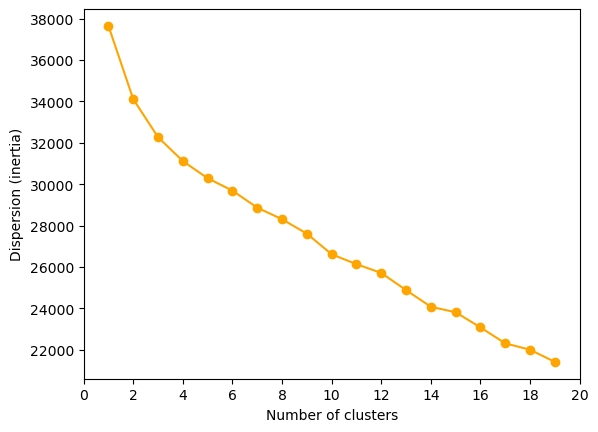

In [10]:
plt.plot(range(1, 20), dispersion, marker='o', color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
#plt.vlines(7, 5000, 600000, color='red')

plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(scaled_info)

info_numeric['cluster_kmeans'] = kmeans.predict(scaled_info)

c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\aprataso\AppData\Local\Temp\ipykernel_1764\3850735758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_kmeans'] = kmeans.predict(scaled_info)


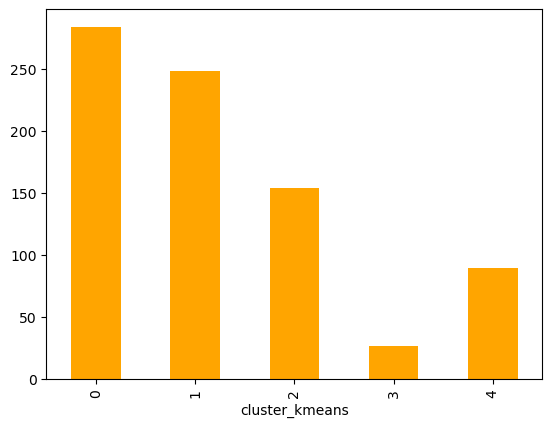

In [12]:
info_numeric.groupby(['cluster_kmeans']).size().plot(kind='bar', color='orange')
plt.show()

In [13]:
pd.set_option('display.float_format', '{:.3f}'.format)

info_numeric.groupby(['cluster_kmeans']).mean().T

#   'A': 0, married
#   'B': 1, single
#   'U': 2 unknown
#     'Single Male': 0,
#     'Single Female': 1,
#     '2 Adults No Kids': 2,
#     '2 Adults Kids': 2

# 0 - singles
# 1 - couples w/o kids 
# 2 - couples w/ kids
# 3 - 
# 4 - rich

cluster_kmeans,0,1,2,3,4
marital_status_code,1.831,0.738,0.552,0.885,0.831
household_key,1222.827,1204.738,1205.214,1303.500,1391.281
adult_category_size,1.000,1.875,2.000,1.577,1.753
has_kids,0.000,0.000,0.987,0.231,0.337
avg_age,43.509,46.677,40.455,44.327,44.635
avg_income,50940.141,65181.452,68746.753,69346.154,99898.876
n_kids,0.000,0.000,1.818,0.423,0.618
n_household,1.278,2.129,3.818,2.269,2.494
gender(s),0.574,1.863,2.000,1.538,1.674
retail_disc,-0.513,-0.545,-0.577,-0.838,-0.512


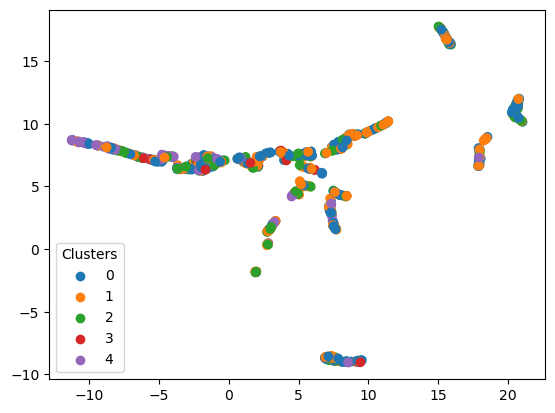

In [18]:
#run umap first

functions.visualize_dimensionality_reduction(umap_embedding, info_numeric['cluster_kmeans'].sort_index())

## Hierarchical

In [23]:
agg_clust = AgglomerativeClustering(
    linkage='ward', distance_threshold=0, n_clusters=None
    ).fit(scaled_info)

c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


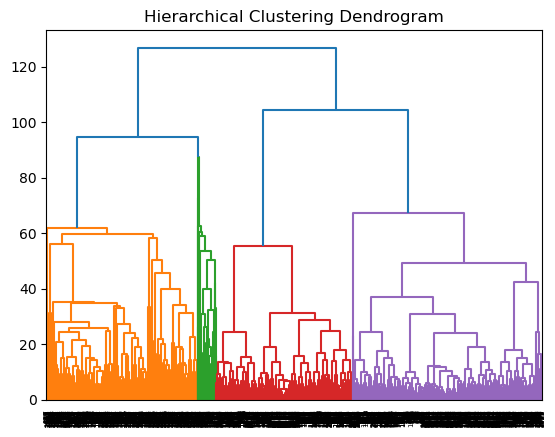

In [24]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
functions.plot_dendrogram(agg_clust, truncate_mode="level", p=50)
plt.axhline(y = 200, color = 'r', linestyle = '-')

plt.show()

In [16]:
info_numeric['cluster_ward'] = AgglomerativeClustering(
    linkage='ward', n_clusters=4
    ).fit_predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_8536\2294577397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_ward'] = AgglomerativeClustering(


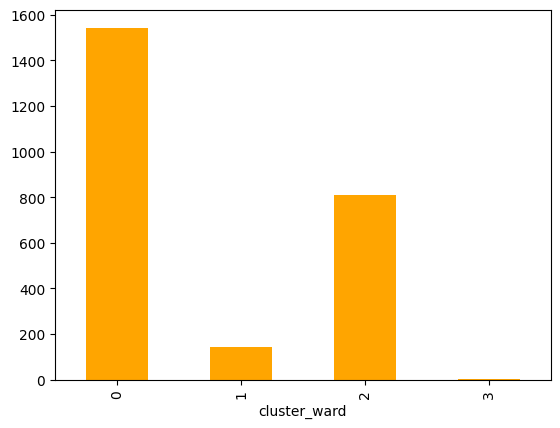

In [17]:
info_numeric.groupby(['cluster_ward']).size().plot(kind='bar', color='orange')
plt.show()

In [18]:
info_numeric.groupby(['cluster_ward']).mean().T

cluster_ward,0,1,2,3
household_key,1222.333,1282.469,1298.655,1023.000
retail_disc,-0.559,-0.521,-0.568,-0.485
coupon_disc,-0.014,-0.021,-0.012,-0.018
coupon_match_disc,-0.002,-0.004,-0.002,-0.002
marital_status_code,1.287,0.917,0.433,2.000
adult_category_size,1.147,1.593,1.990,2.000
has_kids,0.176,0.276,0.657,0.000
avg_age,38.950,42.597,41.234,65.000
avg_income,64218.406,95989.655,101091.862,187000.000
n_kids,0.202,0.448,0.900,0.000


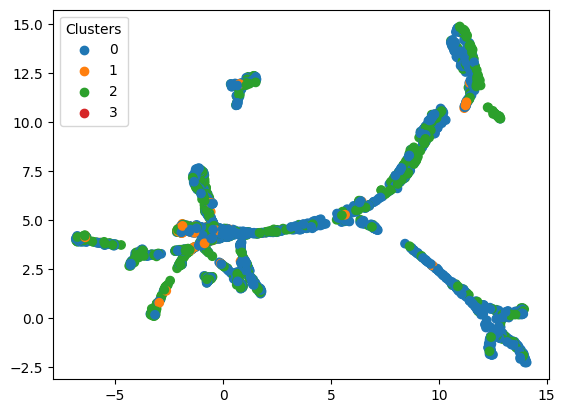

In [29]:
#run umap first

functions.visualize_dimensionality_reduction(umap_embedding, info_numeric['cluster_ward'].sort_index())

## DB Scan

In [20]:
info_numeric['cluster_dbscan'] = DBSCAN(eps=10, min_samples = 40).fit_predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_8536\2362419876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_dbscan'] = DBSCAN(eps=10, min_samples = 40).fit_predict(scaled_info)


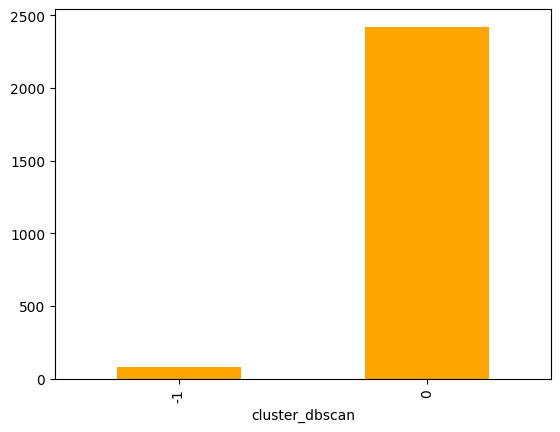

In [21]:
info_numeric.groupby(['cluster_dbscan']).size().plot(kind='bar', color='orange')
plt.show()

In [22]:
info_numeric.groupby(['cluster_dbscan']).mean().T

cluster_dbscan,-1,0
household_key,1391.316,1245.905
retail_disc,-0.551,-0.560
coupon_disc,-0.030,-0.013
coupon_match_disc,-0.004,-0.002
marital_status_code,0.924,0.991
adult_category_size,1.570,1.443
has_kids,0.342,0.338
avg_age,39.804,39.917
avg_income,91126.582,77646.014
n_kids,0.595,0.438


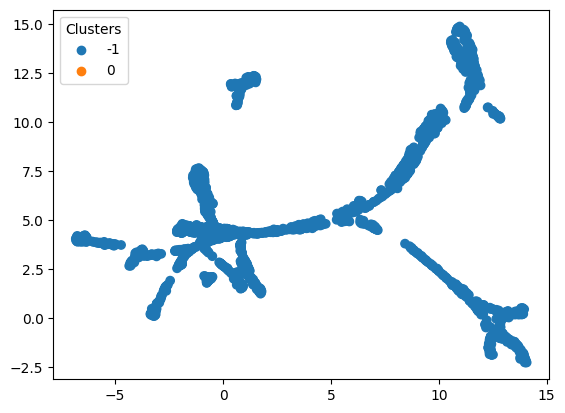

In [30]:
#run umap first

functions.visualize_dimensionality_reduction(umap_embedding, info_numeric['cluster_dbscan'].sort_index())

## UMAP

In [14]:
umap_object = umap.UMAP(n_neighbors=20, min_dist=0.1, n_components=2, random_state=42)

# n_neighbours - neighbours to consider; lower values --> more local structure
# min_dist - min_dist between neighbours; low values --> tighter groups
# n_components - dimensions of the output


In [15]:
X_sample = info_numeric.sort_index()

In [16]:
umap_embedding = umap_object.fit_transform(X_sample)

c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


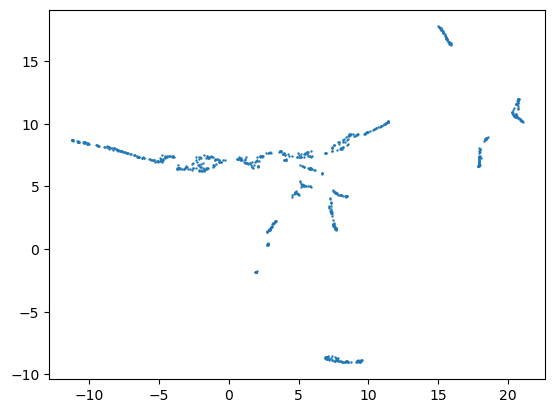

In [17]:
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1],s=0.5)

UMAP TEST

c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users

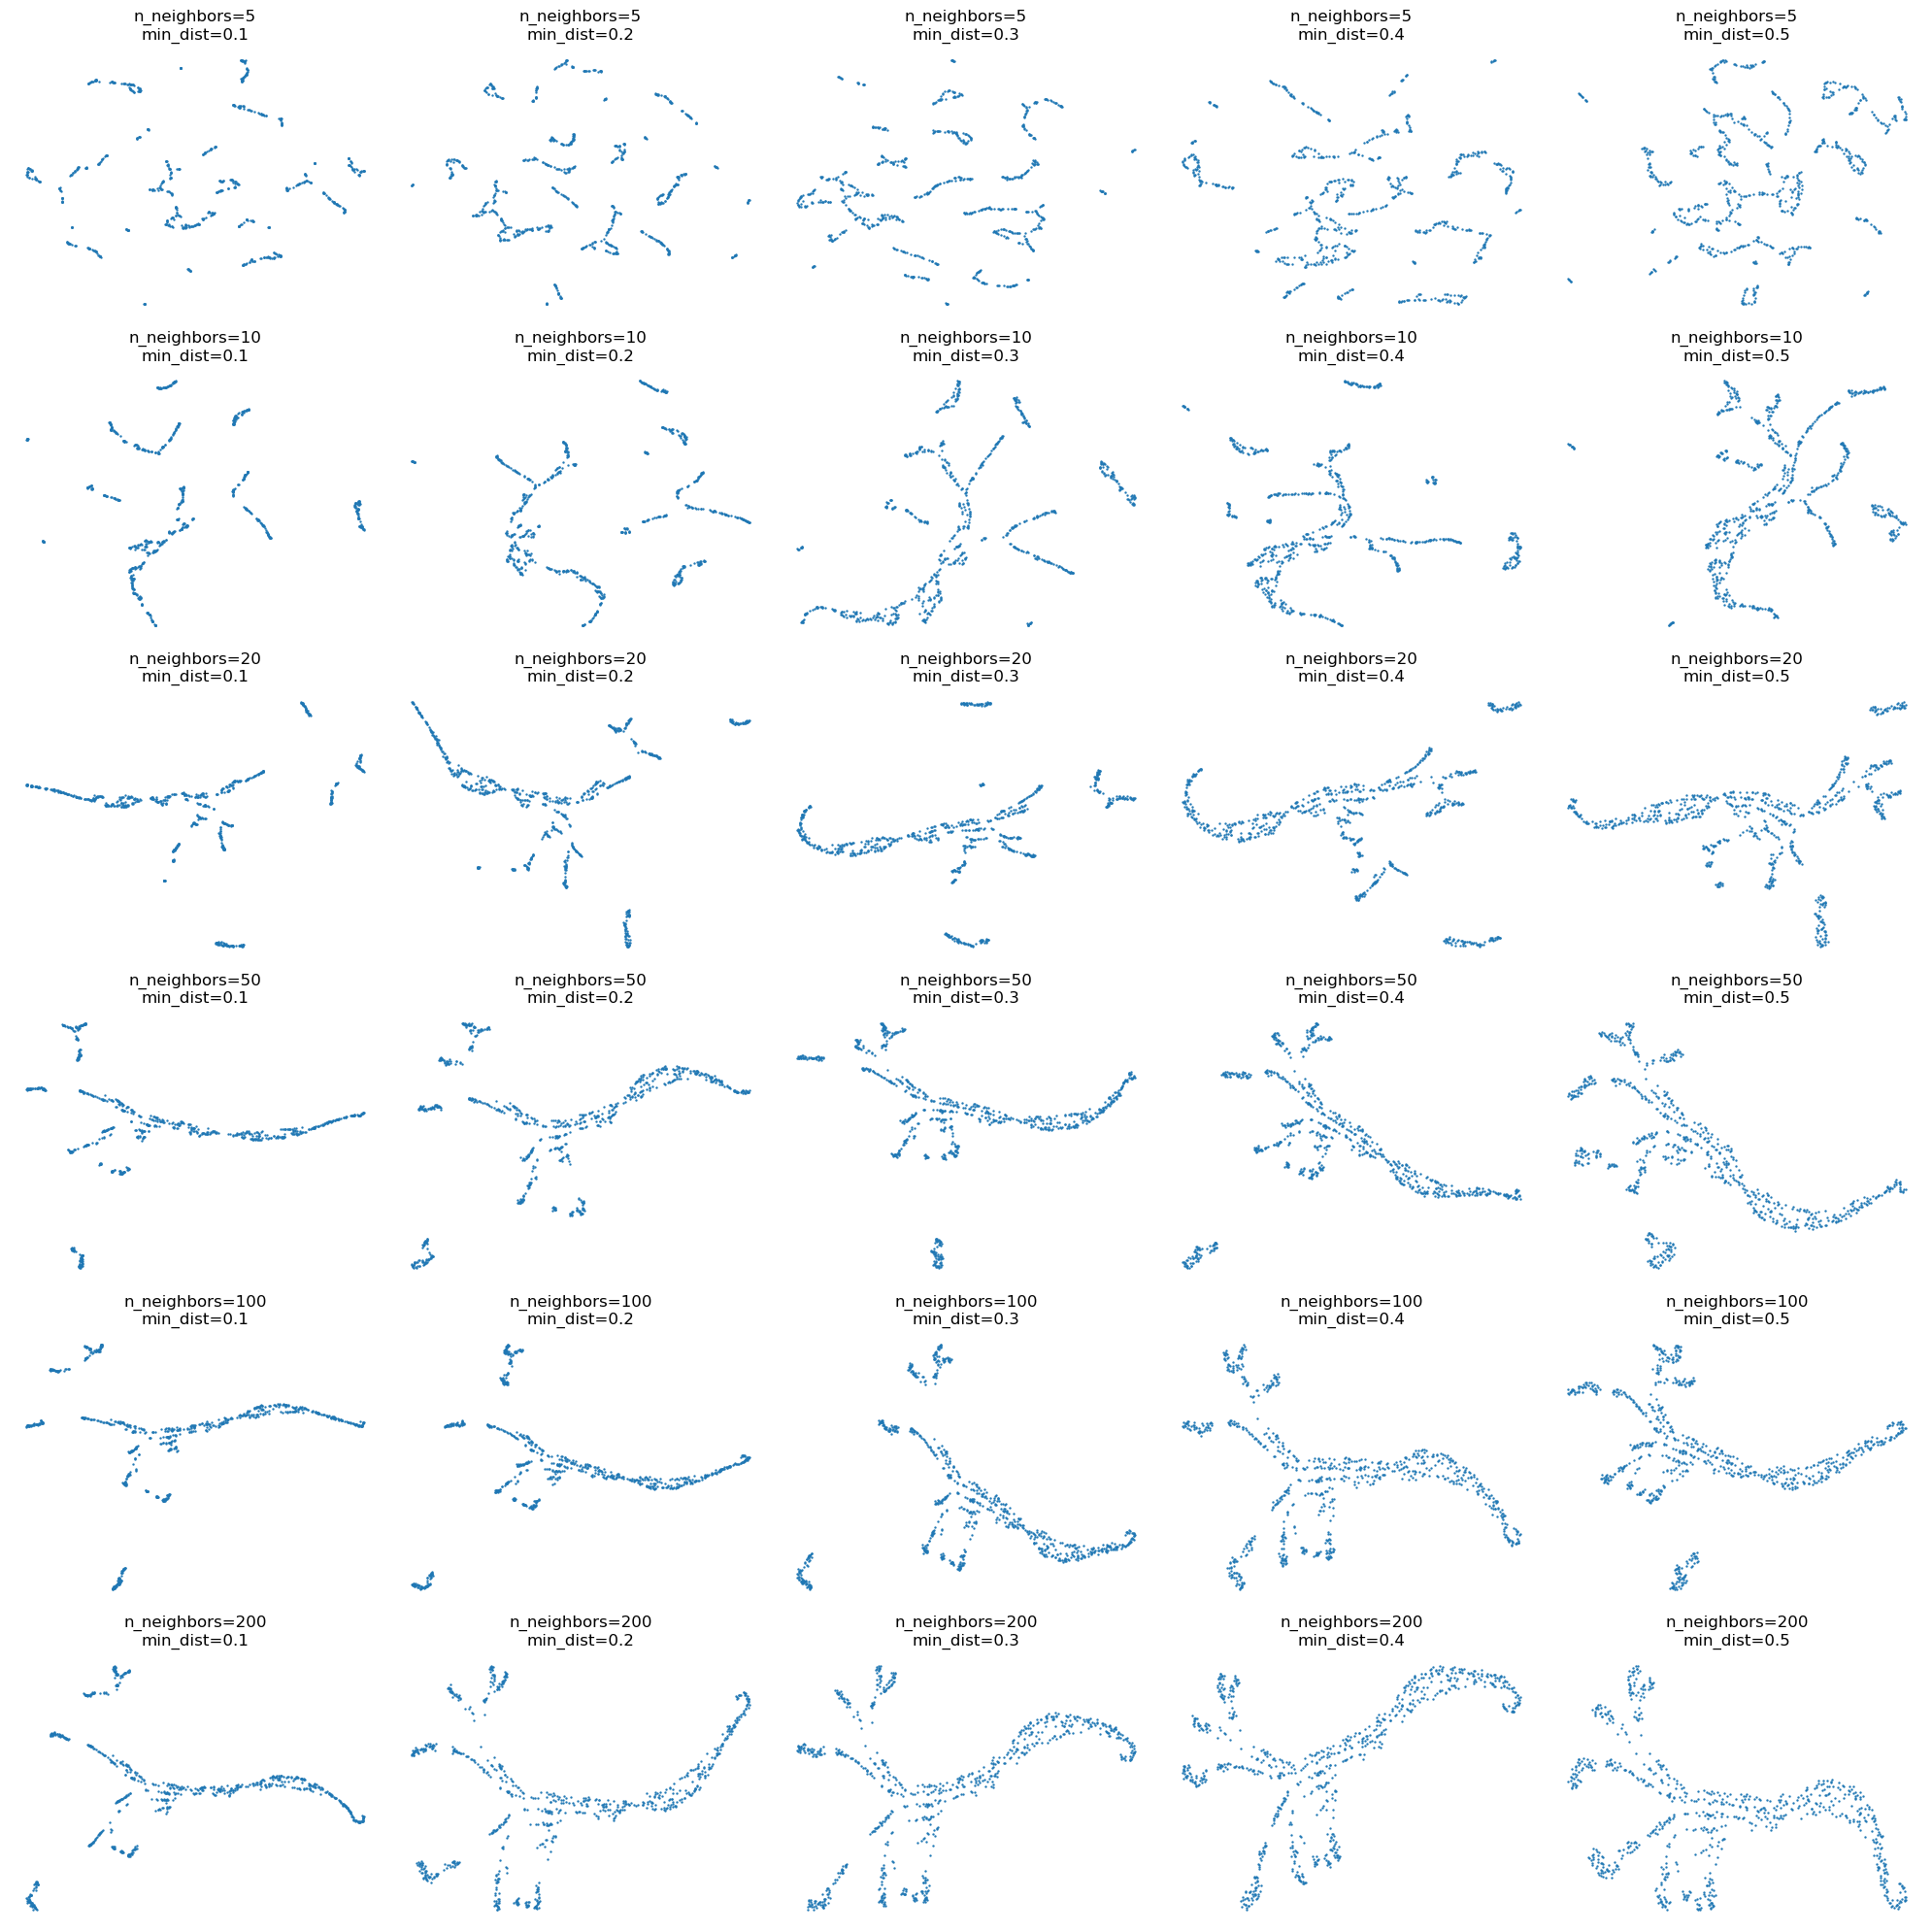

In [19]:
neighbor_ranges = [5, 10, 20, 50, 100, 200]
min_dist_ranges = [0.1, 0.2, 0.3, 0.4, 0.5]

X_sample = info_numeric.sort_index()

# Calculate the number of plots
n_neighbors_len = len(neighbor_ranges)
min_dist_len = len(min_dist_ranges)

# Create a figure with subplots
fig, axs = plt.subplots(n_neighbors_len, min_dist_len, figsize=(20, 20))

# Iterate over the ranges of n_neighbors and min_dist
for i, n_neighbors in enumerate(neighbor_ranges):
    for j, min_dist in enumerate(min_dist_ranges):
        # Create UMAP object with the current n_neighbors and min_dist
        umap_object = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=42)
        
        # Fit and transform the data
        umap_embedding = umap_object.fit_transform(X_sample)
        
        # Plot the results
        ax = axs[i, j]
        ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=0.5)
        ax.set_title(f'n_neighbors={n_neighbors}\nmin_dist={min_dist}')
        ax.axis('off')  # Turn off the axis

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


## UMAP to DB SCAN

In [60]:
clusterable_embedding = umap.UMAP(n_neighbors=50, min_dist=0.1, n_components=2, random_state=42).fit_transform(X_sample)


c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


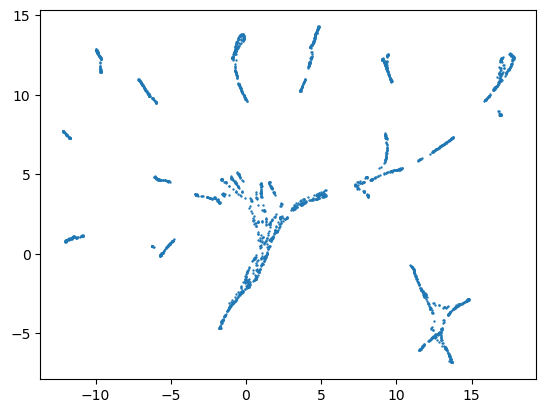

In [61]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],s=0.5)

In [62]:
labels = DBSCAN(eps=2, min_samples=20).fit_predict(clusterable_embedding)

In [63]:
info_numeric['cluster_umap_dbscan'] = labels

C:\Users\aprataso\AppData\Local\Temp\ipykernel_3644\242391019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_umap_dbscan'] = labels


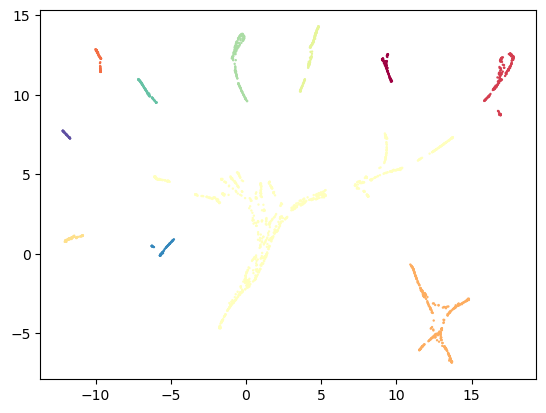

In [64]:
clustered = (labels >= 0) 
# Plotting points not belonging to any cluster in gray (outliers)
plt.scatter(clusterable_embedding[~clustered, 0],
            clusterable_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.3,
            alpha=0.5)

# Plotting points belonging to each cluster
plt.scatter(clusterable_embedding[clustered, 0],
            clusterable_embedding[clustered, 1],
            c=labels[clustered],
            s=0.5,
            cmap='Spectral');

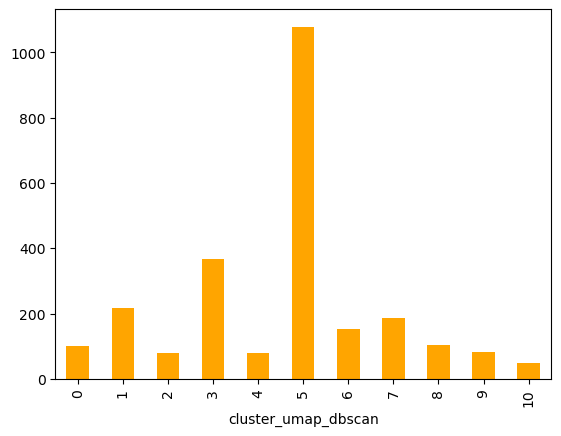

In [65]:
info_numeric.groupby(['cluster_umap_dbscan']).size().plot(kind='bar', color='orange')
plt.show()

In [66]:
info_numeric.groupby(['cluster_umap_dbscan']).mean().T

#0
#1 - pobres
#2 - w/ kids
#5 - love groceries, mt quantidade
#9 - 
#10 - ricos

cluster_umap_dbscan,0,1,2,3,4,5,6,7,8,9,10
household_key,1316.892,1722.794,884.737,936.703,1223.025,1318.758,1135.286,1304.112,890.291,1482.012,1032.820
retail_disc,-0.501,-0.549,-0.525,-0.556,-0.615,-0.563,-0.537,-0.586,-0.585,-0.556,-0.577
marital_status_code,1.108,0.927,0.863,1.174,0.823,0.944,1.214,0.824,0.961,1.110,0.860
adult_category_size,1.441,1.353,1.562,1.215,1.468,1.515,1.429,1.524,1.350,1.524,1.720
has_kids,0.206,0.367,0.512,0.213,0.544,0.328,0.305,0.433,0.456,0.354,0.480
avg_age,49.054,31.757,43.569,31.139,46.310,40.168,44.062,38.246,51.617,55.799,43.080
avg_income,42000.000,29004.587,137000.000,16459.128,162000.000,84147.032,62000.000,87000.000,112000.000,188853.659,224500.000
n_kids,0.314,0.367,0.750,0.262,0.595,0.455,0.429,0.561,0.612,0.427,0.660
n_household,1.882,1.766,2.312,1.534,2.063,2.055,1.961,2.118,1.971,1.963,2.380
Groceries_spend,1743.400,1177.860,1377.358,1295.408,1235.678,2814.394,2342.037,1520.395,1261.918,1288.138,1012.515


## UMAP into Hierarchical

In [36]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_sample = info_numeric.sort_index()
X_umap = umap_model.fit_transform(X_sample)

c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [37]:
# Initialize AgglomerativeClustering
agg_clust = AgglomerativeClustering(
    linkage='ward', 
    distance_threshold=0, 
    n_clusters=None 
)

# Fit the model to the UMAP-reduced data
agg_clust.fit(X_umap)

# The labels_ attribute gives you the cluster assignments
cluster_labels = agg_clust.labels_

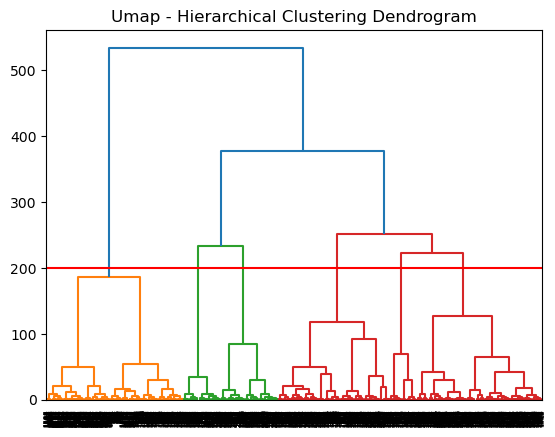

In [38]:
fig, ax = plt.subplots()
plt.title("Umap - Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
functions.plot_dendrogram(agg_clust, truncate_mode="level", p=50)
plt.axhline(y = 200, color = 'r', linestyle = '-')

plt.show()

## Export

In [42]:
info_numeric.to_csv(f'{path}/cluster_data_num.csv', index=False)

## Visualisations

In [46]:
info_numeric.describe()

,household_key,retail_disc,marital_status_code,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,Groceries_spend,Delicacies_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,Seafood_spend,COSMETICS_spend,KIOSK-GAS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,MISC. TRANS._spend,SPIRITS_spend,AUTOMOTIVE_spend,TRAVEL & LEISUR_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,GM MERCH EXP_spend,DELI/SNACK BAR_spend,Photo/Video_spend,RX_spend,VIDEO RENTAL_spend,gender,homeowner_code,total_quantity,total_sales_value,unique_dep_count,cluster_kmeans
count,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000
mean,1250.500,-0.560,0.989,1.447,0.338,39.913,78072.000,0.443,1.954,2033.183,111.688,411.464,52.115,451.721,13.248,51.343,0.851,16.973,39.632,13.850,232.928,0.981,3.282,4.571,9.275,0.194,1.092,0.021,0.440,0.043,0.015,0.033,0.068,0.009,1.135,1.445,104274.249,3449.055,10.005,1.691
std,721.832,0.278,0.852,0.497,0.473,14.452,66852.827,0.706,1.048,2063.025,172.715,456.970,71.598,600.312,38.201,332.715,6.845,41.783,83.126,33.447,532.531,3.752,23.500,35.974,68.039,1.665,3.618,0.495,2.425,0.514,0.328,0.494,1.050,0.280,0.804,1.502,244456.076,3583.873,3.224,1.432
min,1.000,-4.752,0.000,1.000,0.000,21.500,15000.000,0.000,1.000,1.860,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,8.740,1.000,0.000
25%,625.750,-0.637,0.000,1.000,0.000,29.500,29500.000,0.000,1.000,616.980,13.088,92.433,8.852,96.268,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,770.000,1038.827,8.000,0.000
50%,1250.500,-0.504,1.000,1.000,0.000,39.500,62000.000,0.000,2.000,1377.490,49.230,261.750,27.795,240.665,0.000,2.130,0.000,0.000,12.820,1.060,21.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,11084.500,2309.105,10.000,1.000
75%,1875.250,-0.413,2.000,2.000,1.000,49.500,112000.000,1.000,3.000,2816.665,133.697,547.687,69.075,570.535,10.325,16.340,0.000,18.260,41.940,12.197,192.893,0.000,0.000,2.450,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,2.000,87640.000,4722.680,12.000,3.000
max,2500.000,-0.036,2.000,2.000,1.000,65.000,250000.000,3.000,5.000,16223.980,1935.010,3736.710,916.070,5934.370,675.230,11942.400,178.190,938.560,1821.180,566.110,8184.660,80.000,1002.260,1067.880,2827.090,36.020,68.770,21.400,50.450,12.890,13.580,14.970,22.350,11.220,2.000,4.000,4479917.000,41004.030,19.000,4.000


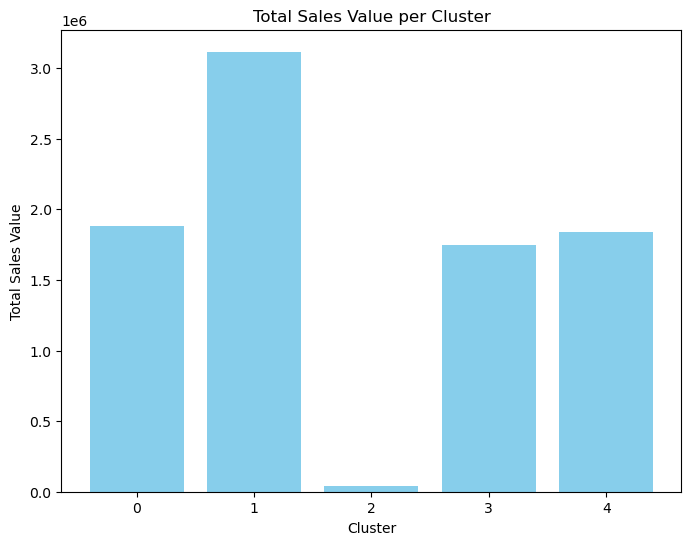

In [45]:
cluster_sales = info_numeric.groupby('cluster_kmeans')['total_sales_value'].sum().reset_index()

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(cluster_sales['cluster_kmeans'], cluster_sales['total_sales_value'], color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Total Sales Value')
plt.title('Total Sales Value per Cluster')
plt.xticks(cluster_sales['cluster_kmeans'])
plt.show()

In [50]:
import matplotlib.pyplot as plt

# Plot histogram for average income
plt.hist(df['avg_income'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Average Income')
plt.ylabel('Frequency')
plt.title('Histogram of Average Income')

# Save the plot as an image
plt.savefig(f'{path}/histogram_avg_income.png')
plt.close()  # Close the plot to free up memory

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['avg_age'], bins=30, kde=True)
plt.title('Distribution of Average Age')
plt.show()


C:\Users\aprataso\AppData\Local\Temp\ipykernel_3644\4062033630.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Average Age', data=avg_age_per_cluster, palette='viridis')


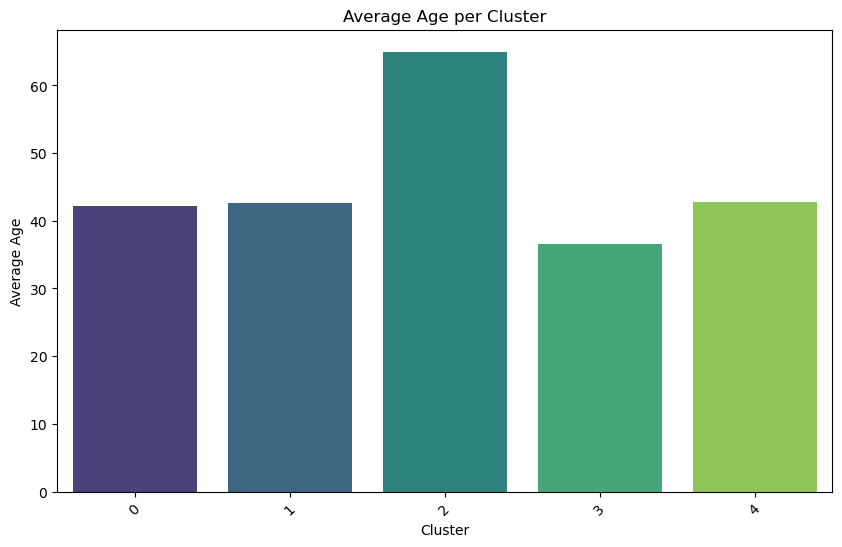

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns

avg_age_per_cluster = info_numeric.groupby('cluster_kmeans')['avg_age'].mean().reset_index()

# Rename columns for better clarity
avg_age_per_cluster.columns = ['Cluster', 'Average Age']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Average Age', data=avg_age_per_cluster, palette='viridis')

# Customize the plot
plt.title('Average Age per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Show the plot
plt.show()


C:\Users\aprataso\AppData\Local\Temp\ipykernel_3644\3141342331.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Number of Observations', data=observations_per_cluster, palette='viridis')


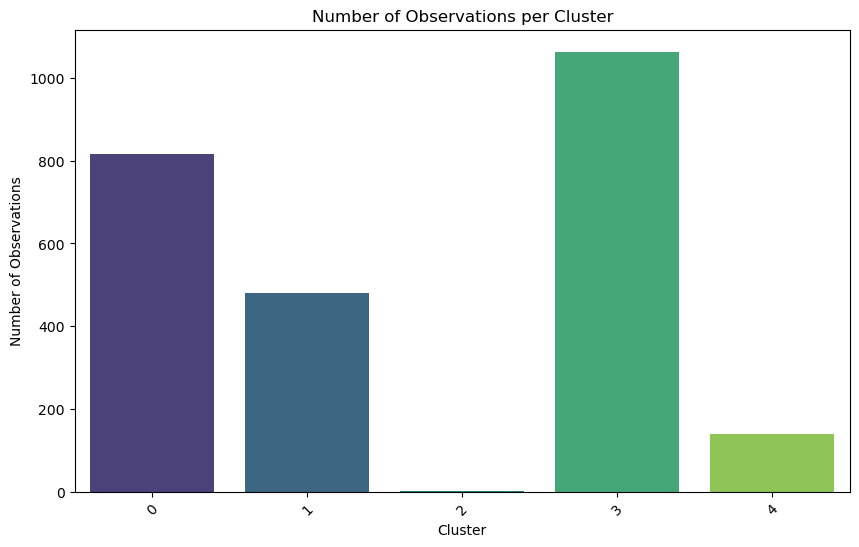

In [17]:
data = info_numeric

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

observations_per_cluster = data['cluster_kmeans'].value_counts().reset_index()

# Rename columns for clarity
observations_per_cluster.columns = ['Cluster', 'Number of Observations']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Number of Observations', data=observations_per_cluster, palette='viridis')

# Customize the plot
plt.title('Number of Observations per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Show the plot
plt.show()


C:\Users\aprataso\AppData\Local\Temp\ipykernel_3644\2440611464.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cluster', y='Number of Observations', data=observations_per_cluster, palette='Set2')


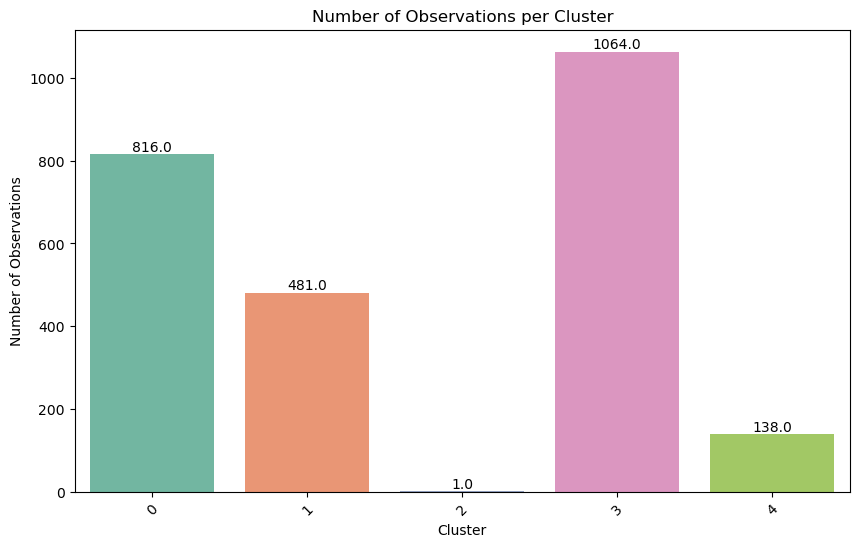

In [20]:
observations_per_cluster = data['cluster_kmeans'].value_counts().reset_index()
observations_per_cluster.columns = ['Cluster', 'Number of Observations']

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Cluster', y='Number of Observations', data=observations_per_cluster, palette='Set2')

# Add annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center',
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points')

# Customize the plot
plt.title('Number of Observations per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Display the plot
plt.show()